### data2数据

In [114]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [115]:
dataset = pd.read_csv('data/data2.csv',engine='python')

In [116]:
dataset

,35KV 3# 主变用电量,data
0,226243296,NaN
1,226244128,832.0
2,226244752,624.0
3,226245584,832.0
4,226246432,848.0
...,...,...
145,226353744,1040.0
146,226354384,640.0
147,226355232,848.0
148,226355840,608.0


In [117]:
dataset = dataset.fillna(0)
dataset

,35KV 3# 主变用电量,data
0,226243296,0.0
1,226244128,832.0
2,226244752,624.0
3,226245584,832.0
4,226246432,848.0
...,...,...
145,226353744,1040.0
146,226354384,640.0
147,226355232,848.0
148,226355840,608.0


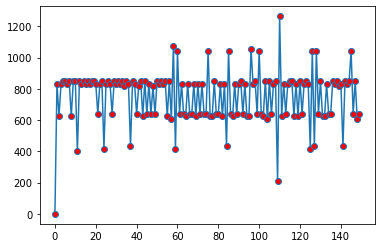

In [118]:
plt.plot(list(range(0,150)),dataset["data"],marker='o',markerfacecolor="r")

In [119]:
#set variable
rs = np.random.RandomState(169)
lendata = dataset.shape[0]
outliers_fraction = 0.1
test_data = []
anomaly = []

In [120]:
def normalize(dataset,a,b):
    scaler = MinMaxScaler(feature_range=(a, b))
    normalize_data = scaler.fit_transform(dataset)
    return normalize_data

In [121]:
#read dataset x,y
x = normalize(pd.DataFrame(dataset, columns=["data"]),-1,1)

In [122]:
ifm = IsolationForest(n_estimators=100,verbose=2,n_jobs=2,max_samples=lendata,random_state=rs,max_features=1)

In [123]:
ifm.fit(x)

Building estimator 1 of 50 for this parallel run (total 100)...Building estimator 1 of 50 for this parallel run (total 100)...

Building estimator 2 of 50 for this parallel run (total 100)...Building estimator 2 of 50 for this parallel run (total 100)...

Building estimator 3 of 50 for this parallel run (total 100)...Building estimator 3 of 50 for this parallel run (total 100)...

Building estimator 4 of 50 for this parallel run (total 100)...
Building estimator 5 of 50 for this parallel run (total 100)...Building estimator 4 of 50 for this parallel run (total 100)...

Building estimator 5 of 50 for this parallel run (total 100)...Building estimator 6 of 50 for this parallel run (total 100)...

Building estimator 7 of 50 for this parallel run (total 100)...Building estimator 6 of 50 for this parallel run (total 100)...

Building estimator 8 of 50 for this parallel run (total 100)...Building estimator 7 of 50 for this parallel run (total 100)...

Building estimator 9 of 50 for this para

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


IsolationForest(max_features=1, max_samples=150, n_jobs=2,
                random_state=RandomState(MT19937) at 0x7FFC52931540, verbose=2)

In [124]:
scores_pred = ifm.decision_function(x)

In [125]:
scores_pred

array([-0.32416261,  0.10070854,  0.05195944,  0.10070854,  0.08632298,
        0.08632298,  0.10070854,  0.08632298,  0.05195944,  0.08632298,
        0.08632298, -0.18181442,  0.08632298,  0.10070854,  0.08632298,
        0.10070854,  0.08632298,  0.10070854,  0.08632298,  0.08632298,
        0.10070854,  0.06593127,  0.10070854,  0.08632298, -0.10248675,
        0.10070854,  0.08632298,  0.10070854,  0.06593127,  0.08632298,
        0.10070854,  0.08632298,  0.10070854,  0.08632298, -0.08524915,
        0.08632298,  0.10070854, -0.0955065 ,  0.08632298,  0.10070854,
        0.06593127, -0.08524915,  0.08632298,  0.05195944,  0.08632298,
        0.06593127,  0.10070854,  0.06593127, -0.08524915,  0.06593127,
        0.08632298,  0.10070854,  0.08632298,  0.10070854,  0.08632298,
        0.05195944,  0.08632298, -0.10610792, -0.20061087, -0.10248675,
       -0.05292891,  0.06593127,  0.10070854,  0.06593127,  0.05195944,
        0.10070854,  0.06593127,  0.06593127,  0.10070854,  0.05

In [126]:
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)

In [127]:
threshold

-0.09550650285316009

In [128]:
dataset

,35KV 3# 主变用电量,data
0,226243296,0.0
1,226244128,832.0
2,226244752,624.0
3,226245584,832.0
4,226246432,848.0
...,...,...
145,226353744,1040.0
146,226354384,640.0
147,226355232,848.0
148,226355840,608.0


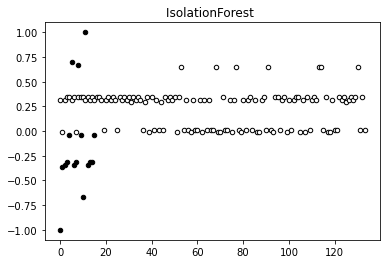

In [129]:
plt.title("IsolationForest ")
for i in scores_pred:
    if i <= threshold:
        #print(i)
        test_data.append(1)
        anomaly.append(i)
    else:
        test_data.append(0)
        
ano_lable = np.column_stack(((dataset['35KV 3# 主变用电量'],dataset['data'],x,scores_pred, test_data)))
df = pd.DataFrame(data=ano_lable, columns=['35KV 3# 主变用电量','data','x', 'IsoFst_Score','label'])
b = plt.scatter(list(range(0,134)),df['x'][df['label'] == 0], s=20, edgecolor='k',c='white')
c = plt.scatter(list(range(0,16)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [130]:
ano_lable = np.column_stack(((df['35KV 3# 主变用电量'],df['data'],x,scores_pred, test_data)))

In [131]:
ano_lable

array([[ 2.26243296e+08,  0.00000000e+00, -1.00000000e+00,
        -3.24162607e-01,  1.00000000e+00],
       [ 2.26244128e+08,  8.32000000e+02,  3.16455696e-01,
         1.00708539e-01,  0.00000000e+00],
       [ 2.26244752e+08,  6.24000000e+02, -1.26582278e-02,
         5.19594415e-02,  0.00000000e+00],
       [ 2.26245584e+08,  8.32000000e+02,  3.16455696e-01,
         1.00708539e-01,  0.00000000e+00],
       [ 2.26246432e+08,  8.48000000e+02,  3.41772152e-01,
         8.63229801e-02,  0.00000000e+00],
       [ 2.26247280e+08,  8.48000000e+02,  3.41772152e-01,
         8.63229801e-02,  0.00000000e+00],
       [ 2.26248112e+08,  8.32000000e+02,  3.16455696e-01,
         1.00708539e-01,  0.00000000e+00],
       [ 2.26248960e+08,  8.48000000e+02,  3.41772152e-01,
         8.63229801e-02,  0.00000000e+00],
       [ 2.26249584e+08,  6.24000000e+02, -1.26582278e-02,
         5.19594415e-02,  0.00000000e+00],
       [ 2.26250432e+08,  8.48000000e+02,  3.41772152e-01,
         8.63229801e-02

In [132]:
df = pd.DataFrame(data=ano_lable, columns=['35KV 3# 主变用电量','data','x', 'IsoFst_Score','label'])

In [133]:
df

,35KV 3# 主变用电量,data,x,IsoFst_Score,label
0,226243296.0,0.0,-1.000000,-0.324163,1.0
1,226244128.0,832.0,0.316456,0.100709,0.0
2,226244752.0,624.0,-0.012658,0.051959,0.0
3,226245584.0,832.0,0.316456,0.100709,0.0
4,226246432.0,848.0,0.341772,0.086323,0.0
...,...,...,...,...,...
145,226353744.0,1040.0,0.645570,-0.052929,0.0
146,226354384.0,640.0,0.012658,0.065931,0.0
147,226355232.0,848.0,0.341772,0.086323,0.0
148,226355840.0,608.0,-0.037975,-0.106108,1.0


In [134]:
df['x'][df['label'] == 1]

0     -1.000000
11    -0.367089
24    -0.341772
37    -0.316456
57    -0.037975
58     0.696203
59    -0.341772
84    -0.316456
96     0.670886
104   -0.037975
109   -0.670886
110    1.000000
125   -0.341772
127   -0.316456
141   -0.316456
148   -0.037975
Name: x, dtype: float64

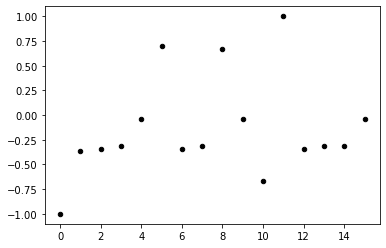

In [135]:
c = plt.scatter(list(range(0,16)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [136]:
print("孤立森林阈值  ：",threshold)
print("全量数据样本数：",len(dataset),"个")
print("检测异常样本数：",len(anomaly),"个")

孤立森林阈值  ： -0.09550650285316009
全量数据样本数： 150 个
检测异常样本数： 16 个
